11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.8879 - loss: 0.3703 - val_accuracy: 0.9823 - val_loss: 0.0685
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9806 - loss: 0.0640 - val_accuracy: 0.9812 - val_loss: 0.0607
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9858 - loss: 0.0444 - val_accuracy: 0.9857 - val_loss: 0.0511
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.9862 - val_loss: 0.0516
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9932 - loss: 0.0212 - val_accuracy: 0.9878 - val_loss: 0.0520
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 139s 81ms/step - accuracy: 0.8703 - loss: 0.4094 - val_accuracy: 0.9872 - val_loss: 0.0458
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 145s 83ms/step - accuracy: 0.9719 - loss: 0.0922 - val_accuracy: 0.9875 - val_loss: 0.0374
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 138s 82ms/step - accuracy: 0.9791 - loss

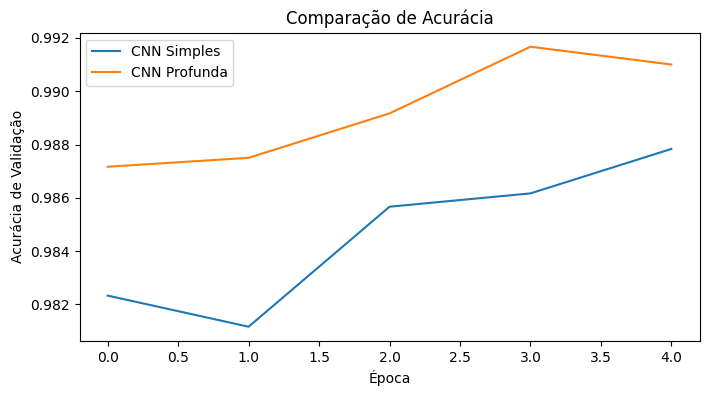

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

model1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

for model in [model1, model2]:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)
history2 = model2.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)

test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)

print(f"Modelo 1 - CNN Simples: Acurácia de teste = {test_acc1:.4f}")
print(f"Modelo 2 - CNN Profunda: Acurácia de teste = {test_acc2:.4f}")

def plot_history(h1, h2, title):
    plt.figure(figsize=(8,4))
    plt.plot(h1.history['val_accuracy'], label='CNN Simples')
    plt.plot(h2.history['val_accuracy'], label='CNN Profunda')
    plt.title(title)
    plt.xlabel('Época')
    plt.ylabel('Acurácia de Validação')
    plt.legend()
    plt.show()

plot_history(history1, history2, "Comparação de Acurácia")
